<a href="https://colab.research.google.com/github/yx1226/GP-in-data-mining-for-ChemBL/blob/main/ChemBL_LinearGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library and tool installation

In [ ]:
# GP Library
!pip install deap 
!pip install gplearn 

# RDKit
!wget -c https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
!time bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

!pip install rdkit
!pip install mordred
!pip install catboost

     |████████████████████████████████| 163kB 5.5MB/s 
     |████████████████████████████████| 51kB 2.2MB/s 
--2021-03-30 14:45:38--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh [following]
--2021-03-30 14:45:39--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88867207 (85M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.3-Linux-x86_64.sh’

Miniconda3-py

     |████████████████████████████████| 67.3 MB 27 kB/s 
     |████████████████████████████████| 27.4 MB 132 kB/s 
     |████████████████████████████████| 13.2 MB 108 kB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=c021fb49d063e7006434e04bd60313f761a398037b932dc8a10a88ae5cdc55e5
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
#!conda install -y -c conda-forge rdkit
from rdkit import rdBase

# Data Preprocessing and Transformation



>Import all the dataset from the Google Drive

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authos# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authoization.
drive.mount('/content/drive', force_remount=True)

# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/ChemBL"

Mounted at /content/drive
 5ht1A.csv     cox.csv		 gplearn_functions.py   mmp.csv     thrm.csv
 5ht3.csv      d2.csv		 gplearn_genetic.py     pde4.csv
 ache.csv     'fxa (1).gsheet'	 hivp.csv	        pkc.csv
 ache.gsheet   fxa.csv		 hivp.gsheet	        renin.csv
 at1.csv       fxa.gsheet	 mmp1.csv	        subp.csv


In [ ]:
import pandas as pd
import numpy as np
from glob import glob

filenames = glob('/content/drive/My Drive/ChemBL/*.csv')
dataframes = [pd.read_csv(f) for f in filenames]

In [ ]:
files = []

# Get the filenames
for filename in filenames:
  files.append(filename)

print(files)

['/content/drive/My Drive/ChemBL/mmp.csv', '/content/drive/My Drive/ChemBL/at1.csv', '/content/drive/My Drive/ChemBL/mmp1.csv', '/content/drive/My Drive/ChemBL/pkc.csv', '/content/drive/My Drive/ChemBL/pde4.csv', '/content/drive/My Drive/ChemBL/5ht3.csv', '/content/drive/My Drive/ChemBL/cox.csv', '/content/drive/My Drive/ChemBL/ache.csv', '/content/drive/My Drive/ChemBL/d2.csv', '/content/drive/My Drive/ChemBL/renin.csv', '/content/drive/My Drive/ChemBL/subp.csv', '/content/drive/My Drive/ChemBL/thrm.csv', '/content/drive/My Drive/ChemBL/5ht1A.csv', '/content/drive/My Drive/ChemBL/hivp.csv', '/content/drive/My Drive/ChemBL/fxa.csv']


In [ ]:
i = 0

for dataframe in dataframes:
  #dataframe = pd.DataFrame(dataframe)
  #dataList.append(dataframe)
  print(files[i])
  i = i +1

  print(dataframe)

/content/drive/My Drive/ChemBL/mmp.csv
      Column1  ... CLASS_LABEL
0        1483  ...           1
1        1484  ...           1
2        1514  ...           1
3        1515  ...           1
4        1548  ...           1
...       ...  ...         ...
3819  1584109  ...           0
3820  1584114  ...           0
3821  1590100  ...           0
3822  1590111  ...           0
3823  1590117  ...           0

[3824 rows x 169 columns]
/content/drive/My Drive/ChemBL/at1.csv
     Column1  ... CLASS_LABEL
0       2725  ...           1
1       9926  ...           1
2      32747  ...           1
3      38798  ...           1
4      38799  ...           1
..       ...  ...         ...
101    16308  ...           0
102    16591  ...           0
103    18694  ...           0
104    18695  ...           0
105    18834  ...           0

[106 rows x 169 columns]
/content/drive/My Drive/ChemBL/mmp1.csv
     Column1  ... CLASS_LABEL
0       1483  ...           1
1       1484  ...           1
2      

> From the data observation, we can see that all the datasets have **169 cols**. So I did the data preprocessing by using standard scaler to check any missing value inside the dataset.



In [ ]:
# MDLPublicKeys are the fingerprints of datasets

index = [#'Column1', 'Column9',	
         'MDLPublicKeys[1]', 'MDLPublicKeys[2]', 'MDLPublicKeys[3]', 'MDLPublicKeys[4]',
         'MDLPublicKeys[5]', 'MDLPublicKeys[6]', 'MDLPublicKeys[7]', 'MDLPublicKeys[8]',
         'MDLPublicKeys[9]', 'MDLPublicKeys[10]', 'MDLPublicKeys[11]', 'MDLPublicKeys[12]',
         'MDLPublicKeys[13]', 'MDLPublicKeys[14]', 'MDLPublicKeys[15]', 'MDLPublicKeys[16]',
         'MDLPublicKeys[17]', 'MDLPublicKeys[18]',' MDLPublicKeys[19]', 'MDLPublicKeys[20]',
         'MDLPublicKeys[21]', 'MDLPublicKeys[22]', 'MDLPublicKeys[23]', 'MDLPublicKeys[24]',
         'MDLPublicKeys[25]', 'MDLPublicKeys[26]', 'MDLPublicKeys[27]', 'MDLPublicKeys[28]',
         'MDLPublicKeys[29]', 'MDLPublicKeys[30]', 'MDLPublicKeys[31]', 'MDLPublicKeys[32]',
         'MDLPublicKeys[33]', 'MDLPublicKeys[34]', 'MDLPublicKeys[35]',	'MDLPublicKeys[36]',
         'MDLPublicKeys[37]',	'MDLPublicKeys[38]',	'MDLPublicKeys[39]', 'MDLPublicKeys[40]',
         'MDLPublicKeys[41]',	'MDLPublicKeys[42]',	'MDLPublicKeys[43]', 'MDLPublicKeys[44]',
         'MDLPublicKeys[45]',	'MDLPublicKeys[46]',	'MDLPublicKeys[47]', 'MDLPublicKeys[48]',
         'MDLPublicKeys[49]',	'MDLPublicKeys[50]', 'MDLPublicKeys[51]',	'MDLPublicKeys[52]', 'MDLPublicKeys[53]',
         'MDLPublicKeys[54]',	'MDLPublicKeys[55]', 'MDLPublicKeys[56]',	'MDLPublicKeys[57]',	'MDLPublicKeys[58]',
         'MDLPublicKeys[59]', 'MDLPublicKeys[60]', 'MDLPublicKeys[61]', 'MDLPublicKeys[62]',
         'MDLPublicKeys[63]',	'MDLPublicKeys[64]', 'MDLPublicKeys[65]',	'MDLPublicKeys[66]',	
         'MDLPublicKeys[67]', 'MDLPublicKeys[68]', 'MDLPublicKeys[69]', 'MDLPublicKeys[70]',
         'MDLPublicKeys[71]', 'MDLPublicKeys[72]', 'MDLPublicKeys[73]', 'MDLPublicKeys[74]', 'MDLPublicKeys[75]', 'MDLPublicKeys[76]',
         'MDLPublicKeys[77]', 'MDLPublicKeys[78]', 'MDLPublicKeys[79]','MDLPublicKeys[80]',	
         'MDLPublicKeys[81]', 'MDLPublicKeys[82]', 'MDLPublicKeys[83]','MDLPublicKeys[84]',	
         'MDLPublicKeys[85]', 'MDLPublicKeys[86]', 'MDLPublicKeys[87]','MDLPublicKeys[88]',
         'MDLPublicKeys[89]', 'MDLPublicKeys[90]', 'MDLPublicKeys[91]','MDLPublicKeys[92]',
         'MDLPublicKeys[93]', 'MDLPublicKeys[94]', 'MDLPublicKeys[95]','MDLPublicKeys[96]',
         'MDLPublicKeys[97]', 'MDLPublicKeys[98]', 'MDLPublicKeys[99]','MDLPublicKeys[100]',
         'MDLPublicKeys[101]', 'MDLPublicKeys[102]', 'MDLPublicKeys[103]','MDLPublicKeys[104]',
         'MDLPublicKeys[105]', 'MDLPublicKeys[106]', 'MDLPublicKeys[107]','MDLPublicKeys[108]',
         'MDLPublicKeys[109]', 'MDLPublicKeys[110]', 'MDLPublicKeys[111]','MDLPublicKeys[112]',
         'MDLPublicKeys[113]', 'MDLPublicKeys[114]', 'MDLPublicKeys[115]','MDLPublicKeys[116]',
         'MDLPublicKeys[117]', 'MDLPublicKeys[118]', 'MDLPublicKeys[119]', 'MDLPublicKeys[120]',
         'MDLPublicKeys[121]', 'MDLPublicKeys[122]', 'MDLPublicKeys[123]', 'MDLPublicKeys[124]',
         'MDLPublicKeys[125]', 'MDLPublicKeys[126]', 'MDLPublicKeys[127]', 'MDLPublicKeys[128]',
         'MDLPublicKeys[129]', 'MDLPublicKeys[130]', 'MDLPublicKeys[131]', 'MDLPublicKeys[132]',
         'MDLPublicKeys[133]', 'MDLPublicKeys[134]', 'MDLPublicKeys[135]', 'MDLPublicKeys[136]',
         'MDLPublicKeys[137]', 'MDLPublicKeys[138]', 'MDLPublicKeys[139]', 'MDLPublicKeys[140]',
         'MDLPublicKeys[141]', 'MDLPublicKeys[142]', 'MDLPublicKeys[143]', 'MDLPublicKeys[144]',
         'MDLPublicKeys[145]', 'MDLPublicKeys[146]', 'MDLPublicKeys[147]', 'MDLPublicKeys[148]',
         'MDLPublicKeys[149]', 'MDLPublicKeys[150]', 'MDLPublicKeys[151]', 'MDLPublicKeys[152]', 
         'MDLPublicKeys[153]', 'MDLPublicKeys[154]', 'MDLPublicKeys[155]', 'MDLPublicKeys[156]', 
         'MDLPublicKeys[157]', 'MDLPublicKeys[158]', 'MDLPublicKeys[159]', 'MDLPublicKeys[160]', 
         'MDLPublicKeys[161]','MDLPublicKeys[162]', 'MDLPublicKeys[163]', 'MDLPublicKeys[164]',
         'MDLPublicKeys[165]', 'MDLPublicKeys[166]'
         #'CLASS_LABEL'
         ]

In [ ]:
import array, random, operator, math
from sklearn.preprocessing import StandardScaler

i = 0
data_distribution = []

for dataframe in dataframes:
  array = dataframe.to_numpy()
  X = array[:,2:168]
  y = array[:,-1]
  data = StandardScaler().fit_transform(X)
  data_distribution = [(files[i],data)]
  print(files[i])
  print(data, "\n")
  i = i +1

/content/drive/My Drive/ChemBL/mmp.csv
[[-0.37115579 -0.05120468  0.         ...  0.13252371  0.3489077
   0.07250947]
 [-0.37115579 -0.05120468  0.         ...  0.13252371  0.3489077
   0.07250947]
 [-0.37115579 -0.05120468  0.         ...  0.13252371  0.3489077
   0.07250947]
 ...
 [ 2.69428641 -0.05120468  0.         ...  0.13252371  0.3489077
   0.07250947]
 [ 2.69428641 -0.05120468  0.         ...  0.13252371  0.3489077
   0.07250947]
 [ 2.69428641 -0.05120468  0.         ...  0.13252371  0.3489077
   0.07250947]] 

/content/drive/My Drive/ChemBL/at1.csv
[[-0.34027852  0.          0.         ...  0.         -2.01186954
   0.        ]
 [-0.34027852  0.          0.         ...  0.          0.49705012
   0.        ]
 [-0.34027852  0.          0.         ...  0.          0.49705012
   0.        ]
 ...
 [-0.34027852  0.          0.         ...  0.          0.49705012
   0.        ]
 [-0.34027852  0.          0.         ...  0.          0.49705012
   0.        ]
 [-0.34027852  0.       

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

tableau_20 = [(31,119,180), (174,199,232), (255,127,14),
              (255,187,120), (44,160,44), (152,223,138),
              (214,39,40), (255,152,150), (148,103,189)]

for i in range(len(tableau_20)):
  r, g, b = tableau_20[i]
  tableau_20[i] = (r/255., g/255., b/255.)

def make_plot(item):
  temp = index[:]
  file_, X = data_distribution[item]
  dfTemp = pd.DataFrame(X, columns=temp)

  print(file_, ":")

  sns.set_style("whitegrid")

  #Check The correlation wherethe is +VE or -VE
  g = sns.jointplot(x = "MDLPublicKeys[54]", y = "MDLPublicKeys[166]",
                    data = dfTemp, kind = "reg", color = tableau_20[6])
  #corr = dfTemp.corr()
  #sns.heatmap(corr)
  
  plt.show()
  print()

/content/drive/My Drive/ChemBL/fxa.csv :


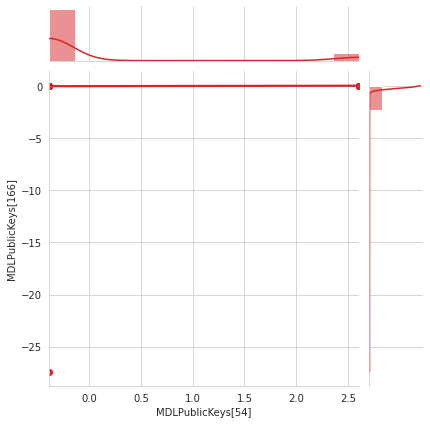


/content/drive/My Drive/ChemBL/fxa.csv :


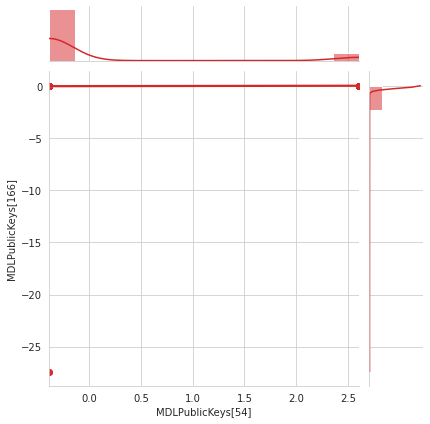


/content/drive/My Drive/ChemBL/fxa.csv :


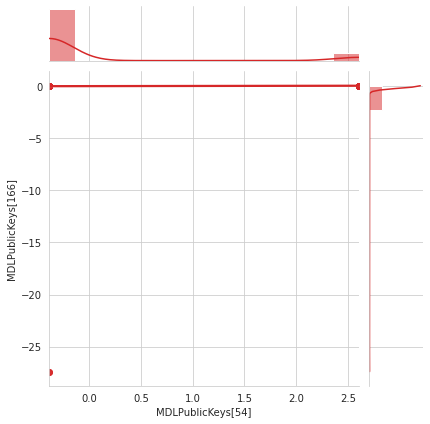


/content/drive/My Drive/ChemBL/fxa.csv :


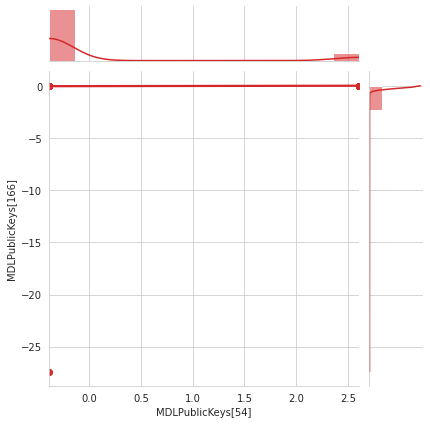


/content/drive/My Drive/ChemBL/fxa.csv :


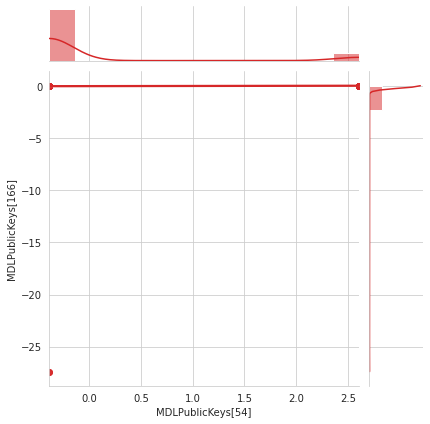


/content/drive/My Drive/ChemBL/fxa.csv :


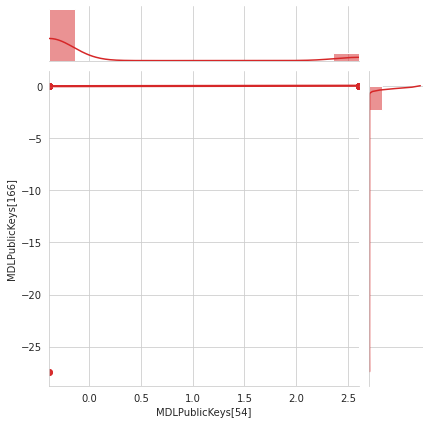


/content/drive/My Drive/ChemBL/fxa.csv :


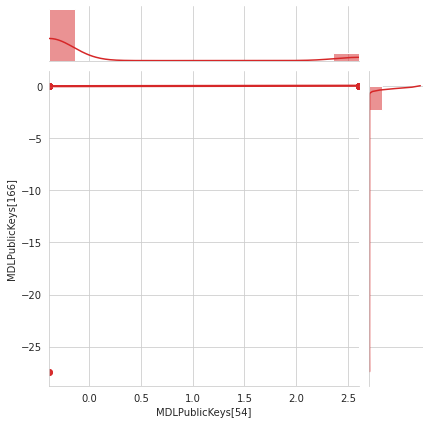


/content/drive/My Drive/ChemBL/fxa.csv :


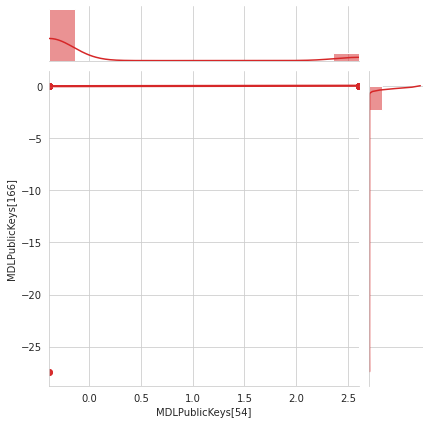


/content/drive/My Drive/ChemBL/fxa.csv :


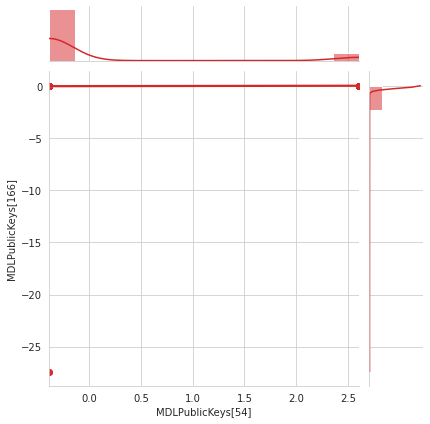


/content/drive/My Drive/ChemBL/fxa.csv :


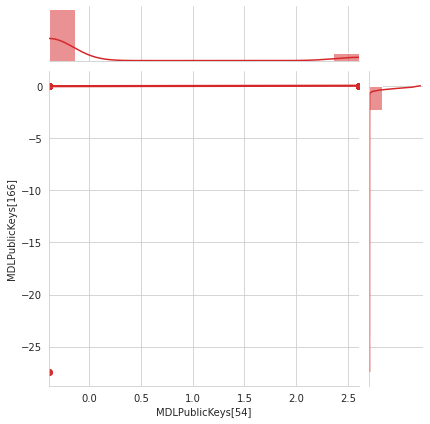


/content/drive/My Drive/ChemBL/fxa.csv :


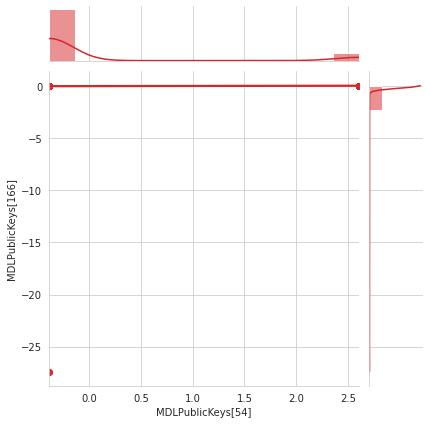


/content/drive/My Drive/ChemBL/fxa.csv :


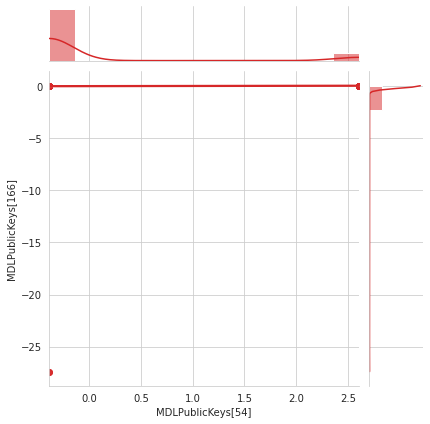


/content/drive/My Drive/ChemBL/fxa.csv :


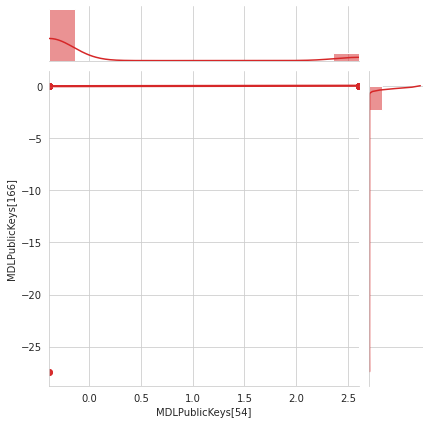


/content/drive/My Drive/ChemBL/fxa.csv :


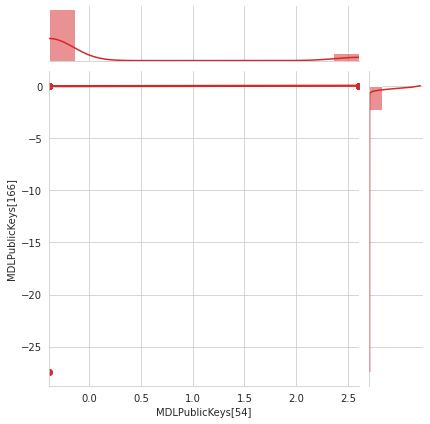


/content/drive/My Drive/ChemBL/fxa.csv :


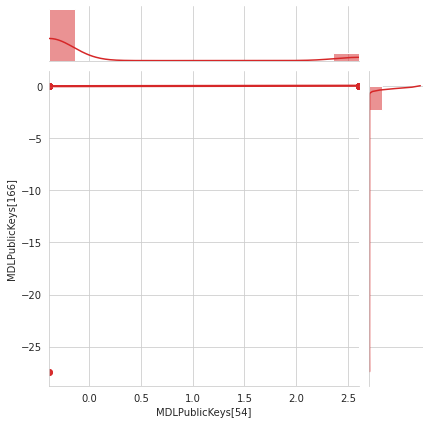

In [ ]:
# for distribution in range(len(data_distribution)):
  # make_plot(distribution)

for dataframe in dataframes:
  array = dataframe.to_numpy()
  X = array[:,2:168]
  y = array[:,-1]
  data = StandardScaler().fit_transform(X)
  for distribution in range(len(data_distribution)):
    make_plot(distribution)

After the data preprocessing, we can know that all of them do not has any missing value.

# Genetic Programming

In [ ]:
pip install lgp

     |████████████████████████████████| 22.3 MB 56.3 MB/s 
     |████████████████████████████████| 303 kB 43.2 MB/s 


In [ ]:
import random
import operator
import math

from deap import algorithms, base, creator, gp, tools
from gplearn.functions import make_function
from gplearn.genetic import SymbolicRegressor
%pylab inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#from linear_genetic_programming.lgp_classifier import LGPClassifier

from sympy import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['array', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
import operator
## CREATE EQUATION 
"""
Terminal 
N: total number of compounds, 
NACT: number of active compounds, 
NINACT: number of inactive compounds, 
TOT: total number of compounds containing fragment I (O, N, C, H, Br, I, Cl, F, S, or P)
ACT: number of active compounds containing fragment I, 
INACT: number of inactive compounds containing fragment I
"""

val1 = {"terminal": "NINACT"}
val2 = {"terminal": "N"}
val3 = {"terminal": "NACT"}
val4 = {"terminal": "INACT"}
val5 = {"terminal": "TOT"}
val6 = {"terminal": "ACT"}

node1 = {
    "func": operator.sub,
    "children": [val2, val3],
    "format_str": "({} / {})",
}

node2 ={
    "func": operator.sub,
    "children": [node1, val4],
    "format_str": "({} - {})",   
}

node3 = {
    "func": operator.sub,
    "children": [node2, val5],
    "format_str": "({} / {})",
}

node4 = {
    "func": operator.sub,
    "children": [node3, val6],
    "format_str": "({} / {})",
}

program = {
    "func": operator.mul,
    "children": [node4, val1],
    "format_str": "({} * {})",
}

def render_prog(node):
    if "children" not in node:
        return node["terminal"]
    return node["format_str"].format(*[render_prog(c) for c in node["children"]])

print(render_prog(program))

(((((N / NACT) - INACT) / TOT) / ACT) * NINACT)


In [ ]:
print(program)

{'func': <built-in function mul>, 'children': [{'func': <built-in function sub>, 'children': [{'func': <built-in function sub>, 'children': [{'func': <built-in function sub>, 'children': [{'func': <built-in function sub>, 'children': [{'terminal': 'N'}, {'terminal': 'NACT'}], 'format_str': '({} / {})'}, {'terminal': 'INACT'}], 'format_str': '({} - {})'}, {'terminal': 'TOT'}], 'format_str': '({} / {})'}, {'terminal': 'ACT'}], 'format_str': '({} / {})'}, {'terminal': 'NINACT'}], 'format_str': '({} * {})'}


In [ ]:
x = 0
for i in dataframes:
  print(x)
  print(files[x])
  print(i['CLASS_LABEL'])
  print("\n\n")
  x += 1

0
/content/drive/My Drive/ChemBL/mmp.csv
0       1
1       1
2       1
3       1
4       1
       ..
3819    0
3820    0
3821    0
3822    0
3823    0
Name: CLASS_LABEL, Length: 3824, dtype: int64



1
/content/drive/My Drive/ChemBL/at1.csv
0      1
1      1
2      1
3      1
4      1
      ..
101    0
102    0
103    0
104    0
105    0
Name: CLASS_LABEL, Length: 106, dtype: int64



2
/content/drive/My Drive/ChemBL/mmp1.csv
0      1
1      1
2      1
3      1
4      1
      ..
390    0
391    0
392    0
393    0
394    0
Name: CLASS_LABEL, Length: 395, dtype: int64



3
/content/drive/My Drive/ChemBL/pkc.csv
0      1
1      1
2      1
3      1
4      1
      ..
206    0
207    0
208    0
209    0
210    0
Name: CLASS_LABEL, Length: 211, dtype: int64



4
/content/drive/My Drive/ChemBL/pde4.csv
0      1
1      1
2      1
3      1
4      1
      ..
251    0
252    0
253    0
254    0
255    0
Name: CLASS_LABEL, Length: 256, dtype: int64



5
/content/drive/My Drive/ChemBL/5ht3.csv
0   

In [ ]:
df_list = []
i = 0
for dataframe in dataframes:
  # name of drugs
  Name = files[i]
  Name = Name[31:-4].upper()

  # total number of compounds
  N = dataframe['CLASS_LABEL'].count() 
  
  # number of active compounds
  NACT = dataframe['CLASS_LABEL'].sum()
  
  # number of inactive compounds
  NINACT = N - NACT
  
  # total number of compounds containing fragment I
  TOT = N * 0.75

  #number of active compounds containing fragment I
  ACT = NACT * 0.7

  # number of inactive compounds containing fragment I
  INACT = NINACT * 0.3

  df = {'Name': Name,
          'N': N,
          'NACT': NACT,
          'NINACT': NINACT,
          'TOT': int(TOT),
          'ACT': int(ACT),
          'INACT': int(INACT)
        }
  df_list.append(df)
  #print(df)
  i +=1

In [ ]:
test = pd.DataFrame(df_list)
test.to_csv("test_dataset.csv")
test

,Name,N,NACT,NINACT,TOT,ACT,INACT
0,MMP,3824,395,3429,2868,276,1028
1,AT1,106,93,13,79,65,3
2,MMP1,395,356,39,296,249,11
3,PKC,211,189,22,158,132,6
4,PDE4,256,229,27,192,160,8
5,5HT3,213,192,21,159,134,6
6,COX,139,125,14,104,87,4
7,ACHE,739,665,74,554,465,22
8,D2,1858,1672,186,1393,1170,55
9,RENIN,982,880,102,736,616,30


In [ ]:
dataset_without_name = dataset.drop(['Name'], axis = 1)

In [ ]:
i = 0
df_list_ = []
# Iterate over column names
for dataframe in dataframes:
  df = dataframe#.iloc[:, 2:168]

  for column in index[0:18]:
    #columnSeriesObj = df[column]
    label = column
    
    # total number of compounds
    N = df[column].count() 
  
    # number of active compounds
    NACT = df[column].sum()
  
    # number of inactive compounds
    NINACT = N - NACT
  
    # total number of compounds containing fragment I
    TOT = N * 0.75

    #number of active compounds containing fragment I
    ACT = NACT * 0.7

    # number of inactive compounds containing fragment I
    INACT = NINACT * 0.3

    df_train = {
          'N': N,
          'NACT': NACT,
          'NINACT': NINACT,
          'TOT': int(TOT),
          'ACT': int(ACT),
          'INACT': int(INACT)
      }
  df_list_.append(df_train)
print(df_list_)
train = pd.DataFrame(df_list_)

#print(render_prog(do_xover(population[0], population[1])))


[{'N': 3824, 'NACT': 112, 'NINACT': 3712, 'TOT': 2868, 'ACT': 78, 'INACT': 1113}, {'N': 106, 'NACT': 2, 'NINACT': 104, 'TOT': 79, 'ACT': 1, 'INACT': 31}, {'N': 395, 'NACT': 57, 'NINACT': 338, 'TOT': 296, 'ACT': 39, 'INACT': 101}, {'N': 211, 'NACT': 13, 'NINACT': 198, 'TOT': 158, 'ACT': 9, 'INACT': 59}, {'N': 256, 'NACT': 2, 'NINACT': 254, 'TOT': 192, 'ACT': 1, 'INACT': 76}, {'N': 213, 'NACT': 0, 'NINACT': 213, 'TOT': 159, 'ACT': 0, 'INACT': 63}, {'N': 139, 'NACT': 4, 'NINACT': 135, 'TOT': 104, 'ACT': 2, 'INACT': 40}, {'N': 739, 'NACT': 1, 'NINACT': 738, 'TOT': 554, 'ACT': 0, 'INACT': 221}, {'N': 1858, 'NACT': 24, 'NINACT': 1834, 'TOT': 1393, 'ACT': 16, 'INACT': 550}, {'N': 982, 'NACT': 2, 'NINACT': 980, 'TOT': 736, 'ACT': 1, 'INACT': 294}, {'N': 847, 'NACT': 2, 'NINACT': 845, 'TOT': 635, 'ACT': 1, 'INACT': 253}, {'N': 844, 'NACT': 5, 'NINACT': 839, 'TOT': 633, 'ACT': 3, 'INACT': 251}, {'N': 1483, 'NACT': 2, 'NINACT': 1481, 'TOT': 1112, 'ACT': 1, 'INACT': 444}, {'N': 2157, 'NACT': 1, 'N

In [ ]:
train.to_csv("train_dataset.csv")
train

,N,NACT,NINACT,TOT,ACT,INACT
0,3824,112,3712,2868,78,1113
1,106,2,104,79,1,31
2,395,57,338,296,39,101
3,211,13,198,158,9,59
4,256,2,254,192,1,76
5,213,0,213,159,0,63
6,139,4,135,104,2,40
7,739,1,738,554,0,221
8,1858,24,1834,1393,16,550
9,982,2,980,736,1,294


In [ ]:

def evaluate(node, row):
    if "children" not in node:
        return row[node["terminal"]]
    return node["func"](*[evaluate(c, row) for c in node["children"]])

print(evaluate(program, train.iloc[0]))

-1288064


In [ ]:
def safe_div(a, b):
    return a / b if b else a

def safe_sqrt(a):
  return a **0.5

operations = (
    {"func": operator.add, "arg_count": 2, "format_str": "({} + {})"},
    {"func": operator.sub, "arg_count": 2, "format_str": "({} - {})"},
    {"func": operator.mul, "arg_count": 2, "format_str": "({} * {})"},
    {"func": safe_div, "arg_count": 2, "format_str": "({} / {})"},
    {"func": safe_sqrt, "arg_count": 1, "format_str": "(√{})"},
    {"func": log, "arg_count": 1, "format_str": "log({})"}
)

from random import randint, random, seed

seed(0)

def random_prog(depth):
    # favor adding function nodes near the tree root and
    # leaf nodes as depth increases
    if randint(0, 10) >= depth * 2:
        op = operations[randint(0, len(operations) - 1)]
        return {
            "func": op["func"],
            "children": [random_prog(depth + 1) for _ in range(op["arg_count"])],
            "format_str": op["format_str"],
        }
    else:
        return {"terminal": train.columns[randint(0, train.shape[1] - 1)]}


POP_SIZE = 100  # population size = 80, 90, 100
population = [random_prog(0) for _ in range(POP_SIZE)]

print(render_prog(population[0]))

def select_random_node(selected, parent, depth):
    if "children" not in selected:
        return parent
    # favor nodes near the root
    if randint(0, 10) < 2*depth:
        return selected
    child_count = len(selected["children"])
    return select_random_node(
        selected["children"][randint(0, child_count - 1)],
        selected, depth+1)

print(render_prog(select_random_node(program, None, 0)))

from copy import deepcopy

def do_mutate(selected):
    offspring = deepcopy(selected)
    mutate_point = select_random_node(offspring, None, 0)
    child_count = len(mutate_point["children"])
    mutate_point["children"][randint(0, child_count - 1)] = random_prog(0)
    return offspring


print(render_prog(do_mutate(program)))

def do_xover(selected1, selected2):
    offspring = deepcopy(selected1)
    xover_point1 = select_random_node(offspring, None, 0)
    xover_point2 = select_random_node(selected2, None, 0)
    child_count = len(xover_point1["children"])
    xover_point1["children"][randint(0, child_count - 1)] = xover_point2
    return offspring


print(render_prog(do_xover(population[0], population[99])))



(NINACT / ((((NACT - NACT) * ACT) * ACT) / (N - INACT)))
(((N / NACT) - INACT) / TOT)
((((((N + NINACT) - (INACT * (log(INACT) * (ACT - (NACT + INACT))))) - INACT) / TOT) / ACT) * NINACT)
(NINACT / ((((NACT - NACT) * ACT) * (N - ((log(INACT) * INACT) - TOT))) / (N - INACT)))


In [ ]:
test = test.iloc[:,1:7]

In [ ]:
test

,N,NACT,NINACT,TOT,ACT,INACT
0,3824,395,3429,2868,276,1028
1,106,93,13,79,65,3
2,395,356,39,296,249,11
3,211,189,22,158,132,6
4,256,229,27,192,160,8
5,213,192,21,159,134,6
6,139,125,14,104,87,4
7,739,665,74,554,465,22
8,1858,1672,186,1393,1170,55
9,982,880,102,736,616,30


In [ ]:
mse = pd.Series(target) - pd.Series(prediction)
mse

0     3621.11805938442*(-log(1028 - 276*log(log(3429...
1     37.1214223865412*(6.846126461648e-6 - log(-3 +...
2     124.116880399082*(1.64339212568663e-7 - log(-1...
3     68.1322243875833*(1.02096865422038e-6 - log(-6...
4     83.1384387633061*(5.65140335648148e-7 - log(-8...
5     66.8804904288239*(1.04959438425021e-6 - log(-6...
6     44.1134900002256*(3.69693967333841e-6 - log(-4...
7     233.850379516476*(2.47445410696778e-8 - log(-2...
8     587.867331972104*(1.55738374133486e-9 - log(-5...
9     316.486966556286*(1.01666261221617e-8 - log(-3...
10    268.31884018831*(1.63988824817544e-8 - log(-25...
11    275.60841786854*(1.55981322172558e-8 - log(-27...
12    470.071271191933*(3.05162686485185e-9 - log(-4...
13    688.86863769517*(9.76960554182047e-10 - log(-6...
14    476.237335789625*(2.93550745313013e-9 - log(-4...
dtype: object

In [ ]:
penalty = node_count(program) ** REG_STRENGTH
penalty

5.015752812467621

In [ ]:
TOURNAMENT_SIZE = 3 # tournament size = 1,2,3,4

def get_random_parent(population, fitness):
    # randomly select population members for the tournament
    tournament_members = [
        randint(0, POP_SIZE - 1) for _ in range(TOURNAMENT_SIZE)]
    # select tournament member with best fitness
    member_fitness = [(fitness[i], population[i]) for i in tournament_members]
    return min(member_fitness, key=lambda x: x[0])[1]

XOVER_PCT = 0.7

def get_offspring(population, fitness):
    parent1 = get_random_parent(population, fitness)
    if random() > XOVER_PCT:
        parent2 = get_random_parent(population, fitness)
        return do_xover(parent1, parent2)
    else:
        return do_mutate(parent1)

REG_STRENGTH = 0.9 # region strength = 0.5

def node_count(x):
    if "children" not in x:
        return 1
    return sum([node_count(c) for c in x["children"]])


def compute_fitness(program, prediction, target):
    mse = pd.Series(target) - pd.Series(prediction)
    penalty = node_count(program) ** REG_STRENGTH
    return mse * penalty

MAX_GENERATIONS = 10
global_best = float("inf")
for gen in range(MAX_GENERATIONS):
    fitness = []
    for prog in population:
        prediction = [
            evaluate(prog, row) for _, row in train.iterrows()]
        target = [
           evaluate(prog, row) for _, row in test.iterrows()]
        score = compute_fitness(prog, prediction, target)
        print(score).format
        fitness.append(score)
        if score < global_best:
            global_best = score
            best_pred = prediction
            best_prog = prog
    print(
        "Generation: %d\nBest Score: %.2f\nMedian score: %.2f\nBest program: %s\n"
        % (
            gen,
            global_best,
            pd.Series(fitness).median(),
            render_prog(best_prog),
        )
    )
    population = [
        get_offspring(population, int(fitness))
        for _ in range(POP_SIZE)]

print("Best score: %f" % global_best)
print("Best program: %s" % render_prog(best_prog))
output = {"target": 300, "pred": best_pred}
pd.DataFrame(output).to_csv("best_pred.csv")

TypeError: ignored

## Data Visualization

In [ ]:
import pygraphviz as pgv

g = pgv.AGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
g.layout(prog="dot")

for i in nodes:
    n = g.get_node(i)
    n.attr["label"] = labels[i]

g.draw("tree.pdf")

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

"""g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
pos = nx.graphviz_layout(g, prog="dot")

nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos, labels)
plt.show()"""

def GPTree_plot():
  g = nx.Graph()
  g.add_nodes_from(nodes)
  g.add_edges_from(edges)
  pos = nx.graphviz_layout(g, prog = "dot")

  nx.draw_networkx_nodes(g, pos)
  nx.draw_networkx_edges(g, pos)
  nx.draw_networkx_labels(g, pos, labels)

  plt.show()

In [ ]:
###################################
#  pyevolve only used in python 2
#  unable used in python 3
###################################

"""!pip install pyevolve

from pyevolve import GTree
genome = GTree.GTree()
gp_genome = GTree.GTreeGP()"""

In [ ]:
from scipy.stats import wilcoxon
wilcoxon()

In [ ]:
"""#Create genome
genome = GTree.GTreeGP()
genome.setParams(max_depth = 4, method = "ramed")
genome.evaluator.set(eval_func)"""